# Quickstart

Welcome to *Lightkurve!* A fast fun package designed to create and analize [Kepler](https://www.nasa.gov/mission_pages/kepler/main/index.html) and [TESS](https://www.nasa.gov/tess-transiting-exoplanet-survey-satellite) time series data in Python. For more information on TESS and what a time series is see our [introduction tutorial](https://github.com/rebekah9969/lightkurve/blob/master/docs/source/tutorials/Tess%20workbook.ipynb).

In order to run *Lightkurve* you will first need to install and become familiar with several packages. 

1. Anaconda: This is a platform that uses [Python](https://www.python.org) and the Conda package manager. Conda is useful as it keeps track of a users Python libraries and secondary software packages. It is through Conda that a user is able to create and install various environments and channels such as *Lightkurve*. Anaconda can be downloaded [here](https://www.anaconda.com/distribution). To run Anacond you must have the bash shell. You can switch to the bash shell temporarily by typing bas or ``bash -l``.

2. Jupyter notebook: A web application that allows you to create Python based documents that can easily be shared. The tutorials given here are written using Jupyter notebooks. For more information about Jupyter notebooks and how to install click [here](https://jupyter.org).


Once you have a working version of [Anaconda Python](https://www.anaconda.com/distribution) installed on your system, it is easy to install *Lightkurve* and its dependencies using the Conda package manager.  In a terminal window, type:
```
$ conda install --channel conda-forge lightkurve
```

If you are using a different Python distribution, you can also install *Lightkurve* using ``pip install lightkurve``.  See our [installation instructions](https://docs.lightkurve.org/about/install.html) page for details and troubleshooting information.

With *Lightkurve* installed, it is easy to extract the brightness of a given object over a period of time (astronomers call this a *light curve*) from the tiny images of stars collected by NASA's Kepler and TESS planet-hunting telescopes.  

Note that both Kepler and TESS use the word **cadence** to describe the number of individual exposures that are co-added together onboard to create a given image of interest. Cadence can be thought of as a time-stamp.

Lets now download and create a light curve for a famous star, for example [KIC 8462852](https://en.wikipedia.org/wiki/KIC_8462852), also known as *Tabby's Star* or *Boyajian's Star*, which is known to show unusual light fluctuations.

First, we open a Jupyter notebook and use the [`search_targetpixelfile`](https://docs.lightkurve.org/api/lightkurve.search.search_targetpixelfile.html#lightkurve.search.search_targetpixelfile) function to obtain the Kepler pixel data for the star from the [data archive](https://archive.stsci.edu/kepler/) (note that in order to obtain Kepler, K2, or TESS data the user must first obtain a MAST account, click [here](https://proper.stsci.edu/proper/authentication/auth) for information on how to do this.)

In [1]:
import numpy as np
import pandas as pd

from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 8462852', quarter=16).download(quality_bitmask='default');

Note here that `search_targetpixelfile` requires several pieces of information. 

1. The ID number of the object of interest and its mission i.e. KIC for Kepler or TIC for TESS.
    
2. Which part of the survey you want to obtain the data from. For Kepler the survey is divided up into quarters, for K2 there are campaigns (see data products [page](https://keplerscience.arc.nasa.gov/data-products.html) for more info), and for TESS sectors. As we are looking at Kepler data we will specify one quarter we want to look at. The default would be all quarters. 
    
3. The quality of the data you want to obtain. This is set using the keyword `quality_bitmask` and more information about this and can be found [here](https://docs.lightkurve.org/api/lightkurve.utils.KeplerQualityFlags.html#lightkurve.utils.KeplerQualityFlags.DEFAULT_BITMASK). We have chosen the default value for this test. Other inputs will cut on a number of observations.

Lets now display the first image in this data set:

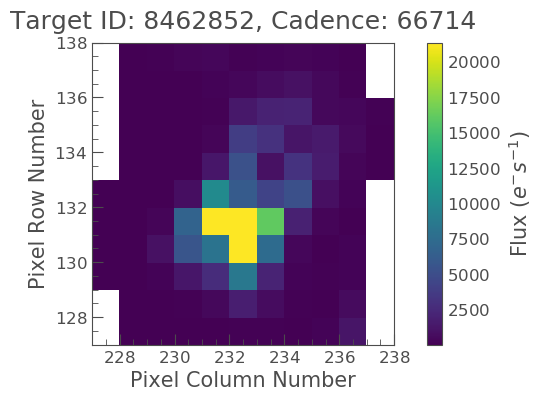

In [2]:
pixelfile.plot(frame=1);

The above plot shows the flux of the object in electrons per second over a given region. It looks like the star is isolated, so we can extract a light-curve by simply summing up all the pixel values in each image. To do this we use the [`to_lightcurve`](https://docs.lightkurve.org/api/lightkurve.targetpixelfile.KeplerTargetPixelFile.html#lightkurve.targetpixelfile.KeplerTargetPixelFile.to_lightcurve) function which collects the flux of an object from specified pixels, i.e. an aperture mask. As there is no contamination our aperture mask is defined as `all`.

In [7]:
lc = pixelfile.to_lightcurve(aperture_mask='all')
print(lc)

KeplerLightCurve(ID: 8462852)


The above method returned a `KeplerLightCurve` object which gives us access to the flux over time, which are both available as array objects.  The time is in units of *days* and the flux is in units *electrons/second*.

We can print the time and flux of the object as follows,

In [8]:
d = {'Time (days)': lc.time, 'Flux (e-/s)': lc.flux}
df = pd.DataFrame(data=d)
print(df)

      Time (days)    Flux (e-/s)
0     1472.117779  258645.031250
1     1472.138212  258660.046875
2     1472.158645  258690.078125
3     1472.179078  258683.328125
4     1472.199511  258655.406250
...           ...            ...
3535  1557.876754  258899.765625
3536  1557.897188  258929.859375
3537  1557.917622  258948.843750
3538  1557.938056  258884.656250
3539  1557.958490  258865.593750

[3540 rows x 2 columns]


We can now plot these data using the `plot()` method:

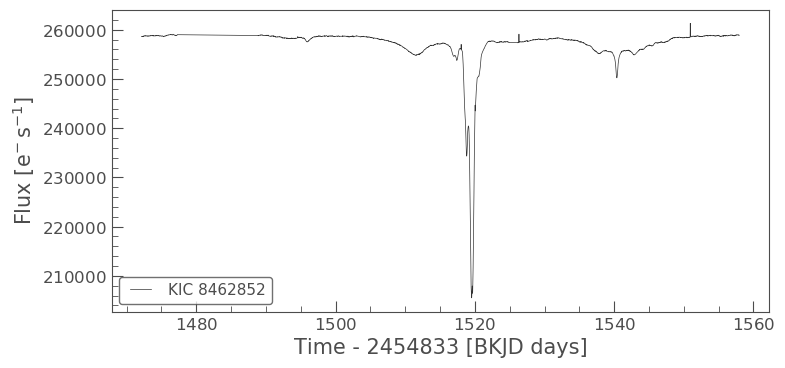

In [9]:
lc.plot();

The plot reveals a short-lived 20% dip in the brightness of the star.  It looks like we re-discovered one of the [intriguing dips in Tabby's star](https://en.wikipedia.org/wiki/KIC_8462852#Luminosity).

Congratulations, you are now able to make new discoveries in Kepler and TESS data!

Next, head to our [tutorials section](https://docs.lightkurve.org/tutorials) to be guided through more detailed examples of carrying out science with Lightkurve!